In [57]:
# First lets get some inports !!!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import acquire as a 
import prepare as p 
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")
#lets pull our dataframe 
df = a.get_telco_data()
df = p.prepare_telco(df)
df = df[p.my_list]
# train, test, validate = p.split_data(df)

In [63]:
df = a.get_telco_data()
customer_id = df['customer_id']
concat_cols = [customer_id,df]
df = pd.concat(concat_cols, axis =1, )
df =  df.drop(columns='Unnamed: 0')





# Now lets Explore: 

## Lets break our columns into catagories

In [372]:
# lets catagorize some of these lists:
demographics = ['sex_male', 'senior_citizen', 'partner', 'dependents']


services_provided = ['phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']

contract_types = ['contract_type_month-to-month',
       'contract_type_one_year', 'contract_type_two_year']

billing = ['paperless_billing', 'monthly_charges', 'total_charges','tenure']


internet_type = ['internet_service_type_dsl', 'internet_service_type_fiber_optic',
       'internet_service_type_none']

contract_type = [ 'contract_type_month-to-month',
       'contract_type_one_year', 'contract_type_two_year']

payment_types = ['payment_type_bank_transfer_(automatic)',
       'payment_type_credit_card_(automatic)', 'payment_type_electronic_check',
       'payment_type_mailed_check']

churn = ['churn']


# lets look at our target variable 

In [365]:
train.churn.mean()

0.22901344154197312

# So we average about a 23 percent churn rate so lets dive in and see if we can find corrolations. 


In [59]:
train.head()

,sex_male,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,internet_service_type_fiber_optic,internet_service_type_none,contract_type_month-to-month,contract_type_one_year,contract_type_two_year,payment_type_bank_transfer_(automatic),payment_type_credit_card_(automatic),payment_type_electronic_check,payment_type_mailed_check,churn
5970,0,0,1,0,47,1,1,1,1,1,...,0,1,0,1,0,0,0,0,1,0
3308,0,0,1,0,68,1,1,1,0,0,...,1,0,0,0,1,0,1,0,0,0
6058,1,0,1,1,43,1,1,1,0,0,...,1,0,0,0,1,0,0,1,0,0
210,1,0,0,0,8,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
4809,0,0,1,0,58,1,1,0,1,0,...,1,0,0,0,0,1,0,1,0,0


# Let's look for patterns only on churn values

In [370]:
churned_customers = train[train['churn'] == 1]

## Most of these look like they are rather standard across the board and dont really tell us anything about churn

In [373]:
# can we see any trends witht the stats summary 
# churned_customers.describe() 
(churned_customers[services_provided].sum()) / len(services_provided)
# train 
# churned_customers= train.drop(columns=services_provided)
# churned_customers.shape
churned_customers = churned_customers.drop(columns=services_provided)

In [374]:
(churned_customers[contract_types].sum()) / len(services_provided)

contract_type_month-to-month    52.875
contract_type_one_year          63.250
contract_type_two_year          23.375
dtype: float64

In [375]:
(churned_customers[internet_type].sum()) / len(services_provided)

internet_service_type_dsl            21.875
internet_service_type_fiber_optic    41.625
internet_service_type_none           18.375
dtype: float64

## Here is a continuous variable, so we wouldnt treat it like the other numerical 
## took the average to see where the average billing information was for customers who churn
## it also looks like paperless billings is trying to tell us 41 % of customers who churn are signed up for paperless_billing,
## it is silly to think that customers churn because they dont get paper bills in the mail so we will drop the column. It almost feels
## discrimitory to judge soley based off demographics.


In [385]:
# billing.remove('paperless_billing')
round((churned_customers[billing]).mean(),2)
# churned_customers = churned_customers.drop(columns= 'paperless_billing')
# churned_customers = churned_customers.drop(columns= demographics)
churned_customers = churned_customers.drop(columns= payment_types)

## We want to check if it is possible to predict churn base off the following features:
- total_charges
- monthly_total
- Internet_service_type: fiber optics
- Tenure



# We will keep the retain related variables and get rid of irreleveant features if any

In [585]:
train['baseline'] = 0
train = train.drop(columns='count'

In [408]:
churned_customers = churned_customers.drop(columns= contract_type)a

In [422]:
churned_customers.internet_service_type_fiber_optic.sum()/ len(churned_customers) * 100

36.87707641196013

In [426]:
churned_customers = churned_customers.drop(columns = ['internet_service_type_dsl', 'internet_service_type_none'])

In [462]:
# Here we set the columns we want.

new_train_df = ['tenure', 'monthly_charges', 'total_charges',
       'internet_service_type_fiber_optic','churn']


In [464]:
train = train[new_train_df]
    


## Now let's get graphing 

In [523]:
((train['internet_service_type_fiber_optic'] == 1) & (train['churn'] == 1)).sum()/len(train) 

0.08445346183109308

In [533]:
corrorlation_matrix = train.corr()
corrorlation_matrix

,tenure,monthly_charges,total_charges,internet_service_type_fiber_optic,churn,count
tenure,1.000000,0.260592,0.826140,-0.002713,-0.249250,NaN
monthly_charges,0.260592,1.000000,0.659389,-0.166261,-0.389702,NaN
total_charges,0.826140,0.659389,1.000000,-0.070949,-0.309569,NaN
internet_service_type_fiber_optic,-0.002713,-0.166261,-0.070949,1.000000,0.031204,NaN
churn,-0.249250,-0.389702,-0.309569,0.031204,1.000000,NaN
count,NaN,NaN,NaN,NaN,NaN,NaN


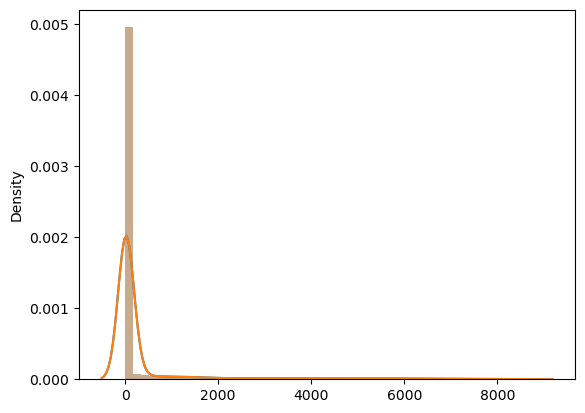

In [543]:
sns.distplot(train)
plt.show()

## Lets test this theory.

## H$_0$: There is no linear connection between monthly charges churn rate

## H$_a$: There is linear connection between monthly charges  and churn rate

# H$_0$: There is no linear connection between tenure and churn rate

# H$_a$: There is linear connection between tenure and churn rate

# H$_0$: There is no linear connection between total charges churn rate

# H$_a$: There is linear connection between total charges and churn rate

# H$_0$: There is no linear connection between fiber optic internet type churn rate

# H$_a$: There is linear connection between fiber optic internet type and churn rate

# Let's Do modeling 

## Lets warm up and define some values

In [3]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# just a reminder of what were working with 

X_train = train.drop(columns=['churn'])
y_train = train.churn

X_validate = validate.drop(columns=['churn'])
y_validate = validate.churn

X_test = test.drop(columns=['churn'])
y_test = test.churn

## From the wise word of a very talent data scientist 

In [4]:
DecisionTreeClassifier()
# make the thing
clf = DecisionTreeClassifier()
# fit the thing
clf = clf.fit(X_train,y_train)
# use the thing
y_pred = clf.predict(X_train)

(train['churn'] == y_pred).mean()

y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.99


## Lets make a few models 

In [19]:
for nums in range(1,20):
    # make the thing
    clf = DecisionTreeClassifier(max_depth= (nums))
    # fit the thing
    clf = clf.fit(X_train,y_train)
    # use the thing
    y_pred = clf.predict(X_train)


    y_pred_proba = clf.predict_proba(X_train)
    y_pred_proba[0:5]
    print('Accuracy of Decision Tree classifier on training set: {:.2f}'
          .format(clf.score(X_train, y_train)))
    print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))
    print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
    print('-----------------------------------------------------------')
    

Accuracy of Decision Tree classifier on training set: 0.77
Accuracy of Decision Tree classifier on validate set: 0.77
Accuracy of Decision Tree classifier on test set: 0.77
-----------------------------------------------------------
Accuracy of Decision Tree classifier on training set: 0.78
Accuracy of Decision Tree classifier on validate set: 0.76
Accuracy of Decision Tree classifier on test set: 0.77
-----------------------------------------------------------
Accuracy of Decision Tree classifier on training set: 0.80
Accuracy of Decision Tree classifier on validate set: 0.79
Accuracy of Decision Tree classifier on test set: 0.79
-----------------------------------------------------------
Accuracy of Decision Tree classifier on training set: 0.80
Accuracy of Decision Tree classifier on validate set: 0.79
Accuracy of Decision Tree classifier on test set: 0.80
-----------------------------------------------------------
Accuracy of Decision Tree classifier on training set: 0.81
Accuracy 

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_train)

print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))



Accuracy of random forest classifier on training set: 0.99
Accuracy of random forest classifier on test set: 0.77


In [30]:
df.isnull().sum()

tenure                               0
monthly_charges                      0
total_charges                        0
internet_service_type_fiber_optic    0
churn                                0
dtype: int64

# **Note:** that the order of the y_pred and y_proba are numpy arrays coming from running the model on X_test. The order of those values will match the order of the rows
# in X_test, so you can obtain the customer_id from X_test and concatenate these values together into a dataframe to write to CSV.

In [32]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [34]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

confusion_matrix(y_train, y_pred)

Accuracy of Decision Tree classifier on training set: 0.97


array([[3018,   22],
       [  17,  886]])